
#### Comparing Matrix Profile Model (new approach) to existing anomaly models

References
* https://www.cs.umn.edu/research/technical_reports/view/09-004
* https://www.cs.ucr.edu/~eamonn/Matrix_Profile_Tutorial_Part1.pdf
* https://towardsdatascience.com/the-matrix-profile-e4a679269692


#### Conclusions and Discussions

*show images for all the datasets ran*

**The effect of window size** <br>
**The effect of z_nomalization**

**How do we want to present it to the user** <br>
Discord is detected on a window of data

**Top k discords** <br>
Determines the number of anomaly we will detect for data <br>
This can be a user input


**Exclusion zone when detecting anomalies** <br>
Exclusion zone eliminates a window of entries around already founds discords when finding the next discord <br>
This is helps eliminate all the subsequence that include the anomaly caising the discord <br>
For this investigation, exclusionzone= +/- window_size, which is the size of the subsequence

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

from src.comparingmodels import (utils, data, models)

import logging
from iotfunctions.enginelog import EngineLogging
EngineLogging.configure_console_logging(logging.INFO)

%load_ext autoreload
%autoreload 2
%matplotlib inline

#### STEPS TO ANALYZE ANOMALY MODELS FOR A GIVEN DATASET <br>
For a given data run the following cells in order <br>

**1. Data Processing** describes the data we want to analyze<br>
**2. Running existing anomaly models** runs the models and summarizes all the anomaly scores calculated from existing model<br>
**3. Visualizing the result** plots the anomaly scores calculated above<br>
**4. Matrix Profile - Anomaly Detection** calculates the matrix profile and plots the anomaly score derived from it<br>


## Select data by uncommenting the corresponding line

In [101]:
datapath='../data/AzureAnomalysample.csv'; columnname='Temperature'; entity='MyRoom'; datasel=columnname
#datapath='../data/Armstark04714B6046D5.csv'; columnname = 'vibrations'; entity='04714B6046D5'; datasel=columnname
#datapath='../data/Armstark04714B604101.csv'; columnname = 'vibrations'; entity='04714B604101'; datasel=columnname
datapath='../data/Cakebread36_datalastweek.csv'; columnname = 'floatvalue'; entity='CakebreadId_0036'; datasel=columnname
#datapath='../data/Cakebreak128.csv'; columnname = 'floatvalue'; entity='CakebreadId_0128'; datasel=columnname
#datapath = '../data/Anomaly_Sample_data.csv'; columnname='TEMPERATURE'; entity='A101'; datasel='pressure'

**1. Data Processing**

In [102]:
#column we want to analyze
md = data.MonitorData(data_sel = datasel)
df_i = md.get_data(datapath=datapath)

df_i.describe()

,floatvalue_saliencyscore,floatvalue_kmeansscore,floatvalue_FFTScore,floatvalue_spectralZscore,floatvalue_spectralScore,floatvalue_GenScore,floatvalue
count,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000
mean,62.743952,35.433105,22.634175,0.290858,27.483107,0.077696,27.469949
std,59.754850,59.012954,73.208845,0.079411,45.302351,0.247126,2.526995
min,2.527780,0.819988,0.000000,0.058189,0.065444,0.000000,21.799999
25%,12.486680,2.302398,0.000000,0.263896,11.431564,0.000000,26.000000
50%,43.347536,3.516629,9.206710,0.324677,18.286799,0.031204,27.600000
75%,97.656003,43.174159,23.240511,0.335925,23.269889,0.083681,28.900000
max,404.851028,212.120950,1031.866210,0.598938,388.287942,3.471869,43.299999


**2. Running existing anomaly models**

In [37]:
#Define ExistingModels with the column we want to run the scoring on
em = models.ExistingModels(columnname=columnname)
df_anomaly = em.run_all(df_i)
df_anomaly.describe()

2020-10-05T16:09:32.668 INFO iotfunctions.dbtables.__init__ Init FileModelStore
2020-10-05T16:09:34.058 WARNING iotfunctions.metadata.__init__ Created a logical entity type. It is not connected to a real database table, so it cannot perform any database operations.
2020-10-05T16:09:34.215 INFO iotfunctions.dbtables.__init__ Init FileModelStore
2020-10-05T16:09:35.458 WARNING iotfunctions.metadata.__init__ Created a logical entity type. It is not connected to a real database table, so it cannot perform any database operations.
Saliency   Entity: MyRoom, result shape: (665,) score shape: (665,) input shape: (4000,)
2020-10-05T16:09:36.102 INFO iotfunctions.dbtables.__init__ Init FileModelStore
2020-10-05T16:09:37.400 WARNING iotfunctions.metadata.__init__ Created a logical entity type. It is not connected to a real database table, so it cannot perform any database operations.
2020-10-05T16:09:39.204 INFO iotfunctions.dbtables.__init__ Init FileModelStore
2020-10-05T16:09:40.530 WARNING i

,Temperature,SpectralAnomalyScore,SaliencyAnomalyScore,KmeansAnomalyScore,FFTAnomalyScore
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,24.264336,7.936961,91.181490,0.721590,88.249432
std,1.484244,29.140010,552.163831,1.037294,338.303626
min,20.000000,0.048718,0.883604,0.000000,0.000000
25%,23.062500,3.809004,7.235512,0.369156,8.617813
50%,24.000000,4.482759,16.354912,0.487829,13.526893
75%,25.437500,5.051216,33.621845,0.584459,19.814321
max,30.750000,815.618754,9960.332316,7.258274,4387.828597


**3. Visualizing the result**

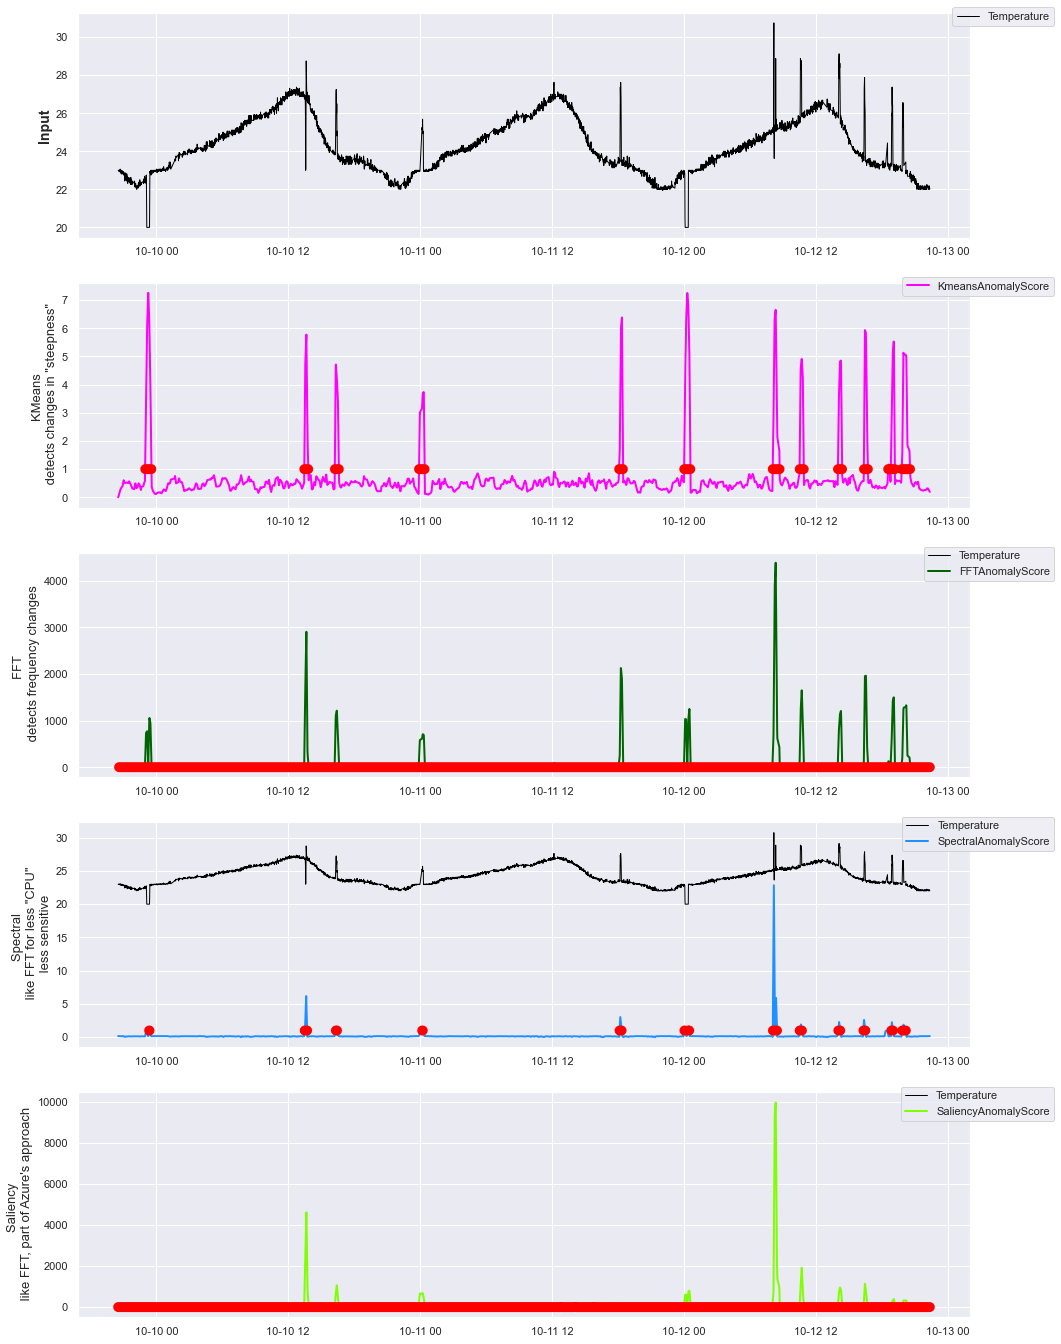

In [38]:
# Simplify dataframe to prepare input for plotting
df_plot = df_anomaly.loc[[entity]]
df_plot.reset_index(level=[0], inplace=True)
em.plot_all(df_plot)

***NEW MODEL*** <br>
**4. Matrix Profile - Anomaly Detection**

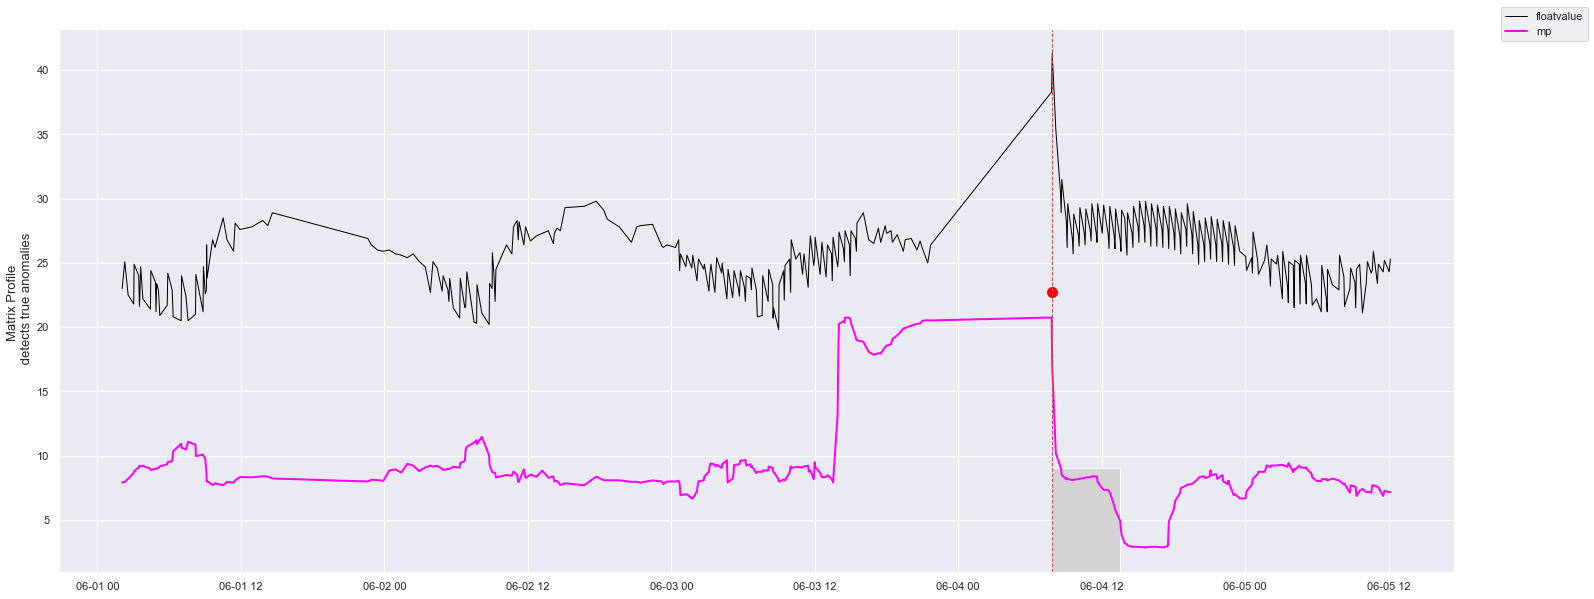

In [105]:
#Matrix Profile
window_size = 2**5
mp = models.MatrixProfile(df=df_i, columnname=columnname, windowsize=window_size,z_normalized=False)
mp.run_model()
df_ret = mp.plot_mp(threshold=1, columnsub=2, printdata=False, motif=False)